In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data and print data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
data = StandardScaler().fit_transform(iris.data) # standardize the data (mean=0, variance=1)
X = pd.DataFrame(data=data, columns=iris.feature_names)
Y = iris.target
print(X.head())

In [ ]:
# split data into train data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay

def matrix(k):
    """
    Helper method, creates the knn classifier, trains it using our test data and returns the confusion matrix plot
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) # train model
    y_pred = knn.predict(x_test) # predict
    plt = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    return plt

def accuracy(k):
    """
    Helper method, creates the knn classifier, trains it using our test data and return its accuracy
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) # train model
    y_pred = knn.predict(x_test) # predict
    return accuracy_score(y_test, y_pred)


In [ ]:
# calculate the model accuracy for different k_neighbors, and table the model accuracy
k_range = range(3,15, 2) # each odd number between 1 and 49
accuracies = [accuracy(k) for k in k_range]
plt.table(cellText=list(zip(accuracies, k_range)), colLabels=["Number of neighbors", "Accuracy"])
plt.axis("off")

matrixes = [matrix(k) for k in k_range]
#plt.show()

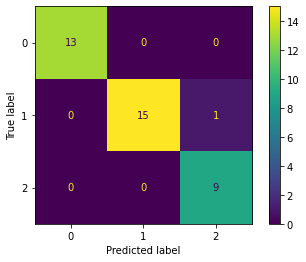

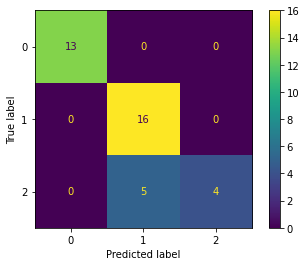

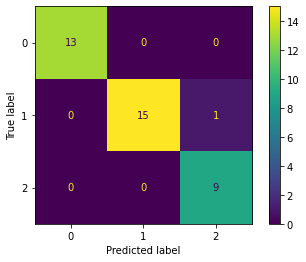

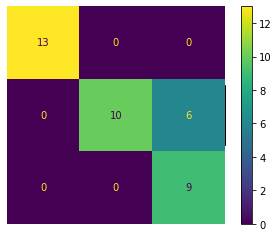

In [155]:
# SVM
from sklearn import svm

def matrix(kernel):
    """
    Helper method, creates the SVM classifier, trains it using our test data and returns the confusion matrix plot
    """
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train) # train model
    y_pred = clf.predict(x_test) # predict
    plt = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    return plt

def accuracy(kernel):
    """
    Helper method, creates the svm classifier, trains it using our test data and return its accuracy
    """
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train) # train model
    y_pred = clf.predict(x_test) # predict
    return accuracy_score(y_test, y_pred)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = [accuracy(k) for k in kernels]
matri = [matrix(k) for k in kernels]
plt.table(cellText=list(zip(kernels, accuracies)), colLabels=["Kernel", "Accuracy"], loc="center")
plt.axis("off")
plt.show()